In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib

## This code implements the Mapping-based approach of SPRINT to assign pseudotime value to each segmented cell of the HCR image. 

To run this code, useres need to provide two input files:

(1) The first input file discribes a reference distribuiton which can be generated using the jupyter notebook entitled 'Pseudotime_to_probe_workflow.ipynb'. It should contain for each cell (row) from the user-provided scRNA-seq dataset, a column for a weighed sum of all the negative genes (negative_coefficients_sum), a second column for a weighed sum of all the positive genes (positive_coefficients_sum), and a third column for the pseudotime value assigned to each cell (Pseudotime). 

(2) The second input file is an intensity distribution that can be generated from the CellProfiler pipline. The file contains for each segmented cell of the HCR image (row), a column for the integrated intensity of the channel for the negative genes (Intensity_IntegratedIntensity_Green_BS) and a column for the integrated intensity of the channel for the positive genes (Intensity_IntegratedIntensity_Yellow_BS).

In [13]:
# Import reference distribution
sample_data_total = pd.read_csv('your_reference_file_name.csv', header = 0, index_col = 0)

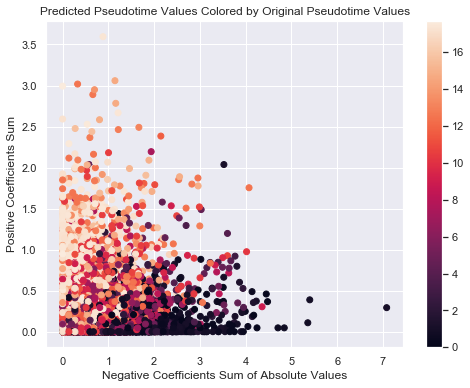

In [17]:
# Plot reference distribution
fig = plt.figure(figsize = (8,6))
plt.scatter(sample_data_total['negative_coefficients_sum']*-1, sample_data_total['positive_coefficients_sum'], c = sample_data_total['Pseudotime'])
plt.title("Predicted Pseudotime Values Colored by Original Pseudotime Values")
plt.xlabel("Negative Coefficients Sum of Absolute Values")
plt.ylabel("Positive Coefficients Sum")
plt.colorbar()

In [18]:
Negative = sample_data_total['negative_coefficients_sum']*-1
Positive = sample_data_total['positive_coefficients_sum']

In [19]:
std_sc_neg = np.std(Negative)
std_sc_pos = np.std(Positive)
mean_sc_neg = np.mean(Negative)
mean_sc_pos = np.mean(Positive)

In [55]:
# Import intensity distribution
Intensity_against_pseudotime = pd.read_csv('your_intensity_file.csv', header = 0)

In [1]:
std_hcr_neg = np.std(Intensity_against_pseudotime['Intensity_IntegratedIntensity_Green_BS'])
std_hcr_pos = np.std(Intensity_against_pseudotime['Intensity_IntegratedIntensity_Yellow_BS'])
mean_hcr_neg = np.mean(Intensity_against_pseudotime['Intensity_IntegratedIntensity_Green_BS'])
mean_hcr_pos = np.mean(Intensity_against_pseudotime['Intensity_IntegratedIntensity_Yellow_BS'])

NameError: name 'np' is not defined

In [58]:
std_ratio_pos = std_sc_pos/std_hcr_pos
std_ratio_neg = std_sc_neg/std_hcr_neg

In [59]:
Scaled_Green = std_ratio_neg*Intensity_against_pseudotime['Intensity_IntegratedIntensity_Green_BS'] + mean_sc_neg - np.mean(std_ratio_neg*Intensity_against_pseudotime['Intensity_IntegratedIntensity_Green_BS'])
Scaled_Yellow = std_ratio_pos*Intensity_against_pseudotime['Intensity_IntegratedIntensity_Yellow_BS'] + mean_sc_pos - np.mean(std_ratio_pos*Intensity_against_pseudotime['Intensity_IntegratedIntensity_Yellow_BS'])

In [60]:
#Calculating the pseudotime value for each segmented cell. 
Score = Scaled_Yellow - Scaled_Green

In [61]:
#The number here should be consistent with the max pseudotime value in the reference file. 
Scale = Score*18/(max(Score)-min(Score))-18*min(Score)/(max(Score)-min(Score))

In [62]:
Intensity_against_pseudotime['Scaled_Green'] = Scaled_Green
Intensity_against_pseudotime['Scaled_Yellow'] = Scaled_Yellow
Intensity_against_pseudotime['Score'] = Score
Intensity_against_pseudotime['Scale'] = Scale

In [64]:
#Export the file conatining the assigned pseudotime values. 
export_Intensity_against_pseudotime = Intensity_against_pseudotime.to_csv('your_output_file.csv', index = None, header=True)